# Unsupervised Learning
## K-Means Clustering
In the final installation of our series introducing data science we consider unsupervised learning. In this case there is no data on results on which to train our model. Instead we consider the case where we have data and wish to derive some understanding from it by organising it in some way. Our task as the modeller is to find the stories hidden in the data, we hope there are some but we don't have a preconceived narrative to fit to. We let our algorithms determine how to organise our data we can then take what information and inutition we can from the results.

This school of machine learning is less established than that of supervised learning. This kind of learning is yet to become established as a staple undergraduate statistics courses and is developing at a such a pace that new supervised learning algorithms are being created each month and keeping up with the volume of publications is near impossible.

We will focus on the 'classic' models initially and learn the more prominent of the nascent techniques. The idea is that learning the ideas and foundations of these algorithms will establish a knowledge that will enable you to pick up new techniques and evaluate new methods for pieces of work looking forwards. Just as with 'the halflife of facts' there will likely be a high attrition rate for unsupervised learning algorithms for a while as the field develops. Its better to learn how to learn than to simply learn the current trend in modelling.

We continue in this spirit.

### Clustering
Clustering is as in data as in cereal. It is the proceess by which 'similar' data points are grouped together into clusters or subgroups. Clearly one's definition of similar is significant here and ultimately how  similar is defined will determine the choice of model and its implementation. What will be consistent across clustering algorithms is that the definition of a cluser ensures that those within it are not only similar to one another but also sufficiently different from data points in another cluser to be differentiated. Again defining 'sufficiently different' is subjective and will influence algorithm implementation.

As mentioned above defining terms in this area requires subjectivity and therefore clarity when presenting a model. In light of this let us define and formalise a couple of terms so that we are all on the same page.

**Similarity** - Similar generally means 'near' to one another in clustering. This is formalised through the use of a *distance metric* which quanifies how close two variables. This is generally the Euclidian distance between two vectors of property measurements but which measurements to include and even sometimes the choice of distance metric is debated. This is at the heart of the model and will heavily influence the outcomes.

**Cluster Centroid** - As one may expect even without fully understanding the term, the cluster centroid is the most representative *feature* of a given cluster. The term feature is used rather than point because the cluster centroid may not correspond to an existing data point in the cluster. The centroid of a cluser is found by avaeraging across all variables used for classification for all data points in the cluster. Hence the cluster centroid is a summary statistic for each cluster. 

### The K-Means Algorithm
The objective of the k-means algorithm is to separate the set of data points provided to it into *k* distint groups or clusters. This means that we must provide the algorithm with the value *k* and the distance metric it is to use for evaluating similarity. 

This means that we must supply the value *k*, however we may not yet have an idea of how many groups we may expect to get out of the model. The provision of the *k* value is the extent to which we 'supervise' the model.

To determine how many groups to split our data into such analysis tends to start by creating a scatter plot of the data. Clearly this is only possible in 1 2 or 3 dimensions so the data may need to be collapsed first  (potentially using principle components analysis) before plotting to evaluate a *k* value. 

Being an unsupervised algorithm we will never get a perfect outcome but we aim for results that are *reasonable and replicable*. Replicable in this case meaning that the outcome has the property that someone else with the same data can arrive at the same end point from a differint starting point. Reliable meaning that the outcomes are true to reality (as far as we can tell given our limited understainding of reality).

#### The Steps of K-Means Clustering
1. Plot data and determine value of *k*.
2. Randomly 'throw down' *k* cluster centroids in the space of the datadet. They will get corrected as the algorithm iterates to a result. We can afford to be random here since we are headed to the 'right' solution and can start from anywhere to get there.
3. Group data according to the centroids placed in 2 by assigning each datapoint to its closest centroid (closest determined by your distance metric, we will use Euclidean distance).
4. Update centroids with the clusters given - average the positions of the points across each cluster to get a new centroid.
5. Rerun the k-means algortithm to reallocate custers (i.e. return to 3.) until an extra iteration no longer makes a difference.

The stopping criterion in 5 can be formalised to stopping once the distance between new and old centroids for each cluster is less than some small value epsilon ($\epsilon$).

## Building the Model

Time to code!

As ever we begin by bringing in the modules we know and love including the package for contacting the operating system (to access files directly), NumPy, matplotlib and its imaging modules, our k-means model from Sci-Kit Learn and a utility to tell the time. We also set our charts to appear as inline images in this notebook.

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from time import time

For our example we will work on image segmentation. Images often have a few dominant colours (e.g. the blue of the sky or the green of a forest landscape).

In our example we will use a k-means clustering alorithm to work out the dominant colours for images. Knowing the dominant colours will then enable us to compress (or 'quantise') images by using only the pallet of *k* colours we have evaluated as dominant.

First let us get an image.

I have already downloaded a couple of images and put them in the folder Data/k-means/imgs, the original photos are taken from a Columbia University Data Science Society guide to clustering and are available <a href="https://github.com/cerrno/intro-to-datascience/tree/master/datasets/kmeans/imgs">here</a>.

Let's start with the picture of Leonardo Di Caprio, normalising it so that all colour values are between 0 and 1.

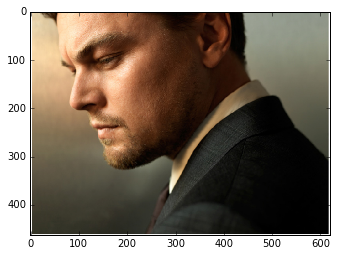

In [23]:
img_path = os.path.join('Data/k-means/imgs', imgs[0])
img = mpimg.imread(img_path)
img = img / img.max()
imgplot = plt.imshow(img)

Our image here is represented as a three-dimensional array of floating point numbers normalised to be between 0 and 1. 

Let's consider the shape of this array.

In [4]:
img.shape

(462, 621, 3)

The 'shape' of the image is 462 pixels high, 621 pixels wide and each picture has three colour channels (red green and blue, so each pixel is given by an rgb value).

Let's use a sample of 10% of these pixels thereby reducing our dataset to roughly 29,000 pixels. This will speed things up and should still be able to provide meaningful results.

In [5]:
width, height, num_channels = img.shape
num_pixels = width * height
num_sample_pixels = round(num_pixels / 10)

print('Sampling {} out of {} pixels.'.format(num_sample_pixels, num_pixels))

Sampling 28690 out of 286902 pixels.


To take our sample we must reshape the set of image pixels to a single list of pixels in one dimension so that we may take our sample.

In [6]:
img_reshaped = np.reshape(img, (num_pixels, num_channels))
img_sample = shuffle(img_reshaped, random_state=0)

#### Time to start the k-means work!
We'll use 20 colours to summarise our image; that is we set $k = 20$.

In [7]:
k = 20
t0 = time()
kmeans = KMeans(n_clusters=k, random_state=0)

kmeans.fit(img_sample)
print("K-means clustering complete. Elapsed time: %.2f seconds" % (time() - t0))

K-means clustering complete. Elapsed time: 45.76 seconds


To get the 20 'most significant' colours in the image we take the 20 cluster centroids. This is of colours is available through `kmeans.cluser_centers_`. To match the pixels to their closest colours (i.e. map each pixel to the centroid of the cluster it belongs to) we can simply run `kmeans.predict()`, this will also tell us the size of each cluster. Running this prediction leads to image compression or quantisation.

In [8]:
kmeans.cluster_centers_

array([[ 0.07726479,  0.06172659,  0.04572889],
       [ 0.87642509,  0.67416334,  0.50680351],
       [ 0.51811594,  0.51685715,  0.43572447],
       [ 0.21679291,  0.21426852,  0.17704645],
       [ 0.98117697,  0.98098147,  0.97990966],
       [ 0.47047216,  0.43090817,  0.33781967],
       [ 0.93370312,  0.77720642,  0.6102429 ],
       [ 0.57572496,  0.59760445,  0.53634489],
       [ 0.35822994,  0.18976767,  0.09968582],
       [ 0.66178977,  0.48079613,  0.33098748],
       [ 0.46350974,  0.26758528,  0.15743418],
       [ 0.01431897,  0.01277372,  0.01052192],
       [ 0.77477032,  0.56303918,  0.39980781],
       [ 0.26190573,  0.12887542,  0.05544841],
       [ 0.15428458,  0.15619907,  0.13352805],
       [ 0.28842545,  0.27855951,  0.22792239],
       [ 0.58572066,  0.36479795,  0.23023933],
       [ 0.97827715,  0.8518002 ,  0.70266616],
       [ 0.17197873,  0.07767163,  0.03034416],
       [ 0.36878815,  0.35130066,  0.2822558 ]], dtype=float32)

In [16]:
t0 = time()
labels = kmeans.predict(img_reshaped)
print("k-means labeling complete. Elapsed time: %.3f seconds" % (time() - t0))

k-means labeling complete. Elapsed time: 0.232 seconds


We can now make a histogram of our 20 colours showing how frequently they appear in the image. This can help us understand the general tone of the picture and gain an idea whether or not we have included enough colours. If, for example, the least frequent of our colours appears very infrequently in the picture then it suggests that adding more colours would increase the fidelity of the image but our current colours are already close to the true image whilst still reducing the image a little.

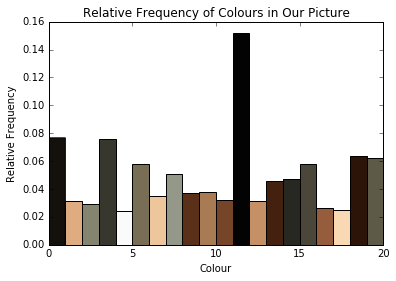

In [20]:
n, bins, patches = plt.hist(labels, bins=range(k+1), normed=1)

for p, color in zip(patches, kmeans.cluster_centers_):
    plt.setp(p, 'facecolor', color)

plt.ylabel('Relative Frequency')
plt.xlabel('Colour')
plt.title('Relative Frequency of Colours in Our Picture')

We can see from the histogram that the background colour and the colour of Leo's suit dominates the image with the lighter foreground colours being more diverse adding detail to the picture of his face.

We now have all we need to redraw the picture simply with the 20 colours we picked out. This technique can be used to reduce the size of the image through what is known as *quantisation*. This reduces image size by only storing a colour map for the 20 colours and then reference to a colour 1 through 20 (rather than a full RGB specification of the colour) for each pixel. This reduces the colour channel of the image to one dimension rather than three. 

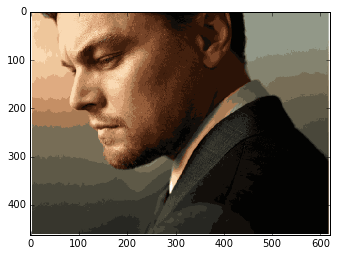

In [21]:
quantized_img = np.zeros(img.shape)
for i in range(width):
    for j in range(height):
        index = i * height + j
        quantized_img[i][j] = kmeans.cluster_centers_[labels[index]]
quantized_imgplot = plt.imshow(quantized_img)

Note that, as we may expect the image looks similar but the gradients are no longer smooth and the contrast is a little more limited. This is due to forcing any gradients to be along at most *k* steps and the jumps must be between any two of the *k* colours we have limited our image to having. 

This work will hopefully have shown you that data is not only measurements from experiments and click counts but simply measurements of things around us, in this case colour. We have analysed the colours of a picture to narrow the spectrum down to twenty colours and reimagine the world through our new data-powered kaleidoscope.

### Limitations and Extensions
#### Choosing 'the Right' *K*
When considering the use of a k-means algorithm one is either in the suitation where the number of desired clusers (*k*) is known or it is not known.

##### Known K
Taking the easy case first: where *k* is known (maybe because your data is from an experiement on three categories of cell so that $k = 3$) simply plug the known value of *k* into your algorithm and run. Be careful to check that the *k* clusters you get out at the end relate to the reason for having *k* as an input. It may be that the initial data set shows no separation of groups and the algorithm has only lead to suprious results. This is where human interpretation is needed for the algorithms to be at all useful.

##### Unknown K
Now the more difficult case: what if the number of centroids is not known at the outset? Clearly there are two extreme cases that form the end points of a spectrum of results for different *k* values. Neither extreme case provides any additional information. 

One case lets every datapoint become its own representative centroid (a perfect centroid). This clearly does not change the dataset from the original offering no grouping. A problem of overfitting leading to a perfect fit but not informative analysis.

The other extreme case has only one centroid (perfect grouping) and therefore averages all values in the dataset providing purely a measure of location collapsing the dataset to a single 'representative' point. This is a problem of underfitting. No information is provided since every data point is placed into a single group and hence no datapoint can be distinguished from any other by this methodology.

These problems, of underfitting and overfitting, are prevanlant in all of statistical analysis or data science. In the case of k-means clustering we have found a clear way of desribing how the problems become manifest.

We are still left with the issue of choosing 'the right *k*'. This is a difficult problem since we must be wary of under- or over-fitting the data. We can appeal to the idea of stability for a solution: if the clusters obtained represent a true underlying pattern in the data then they should not change with similar datasets. We may therefore subsample our original dataset and compare results from clustering on the different subsamples to find values of *k* for which our clustering outcomes are stable. This will be noted where the group memberships of given datapoints do not change dramatically with the (sub)sample used. If the datapoints jump between groups in different samples then the model is likely too finely tuned to the noise in the dataset. This notion of stability to peterbations and noise in the data is important across statistics, data science and machine learning.

Since we would like to explain as much as we can and we have a test (of sorts) for overfitting the data we can therefore choose a value of *k* by running our stability tests for a range of *k* values and choosing the largest *k* that yield stable results. Whilst also being wary that our model makes sense in all ways we can montior as ever in coputer powered modelling.

Futher to this there are more formal approaches that appeal to ideas of penalisation for increased degrees of freedom (like the use of adjusted-$R^2$ over simple $R^2$ in OLS regressions). Two well-known approaches that we may explore more as we journey into data sciene are the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC) which aim to keep the value of *k* 'under control'.

##### What if the Data Cannot be Clustered?
Some features do not allow for clean clustering. For example preferences: people may like multiple genres of music and therefore clustering by music preference can struggle to split a lover of metal and house from a lover of house and acoustic guitar covers. 

One way to get around this problem is to use 'fuzzy' or probabalistic clustering which sets clusters and allows each datapoint to have a probability as to which of the available clusters it belongs to. This allows clusters to be drawn whilst acknowledging that data points may fit different clusters albeit to differing degrees.

### Other Areas for Consideration
**Choice of Features:** If your model keeps providing spurious results then you may be clustering on poor indicators. For example clustering users into economic categories based on how many facebook friends they have may be a noisy and spurious link. This is known as *garbage in garbage out*. Models, however good, cannot compensate for misuse or poor data.

**The Distance Metric:** In our image analysis we used the Euclidean distance as is typical in k-means clustering. However it is possible to pursue other measures of distance biological and object recognition algorithms often use non-Euclidian distance metrices like those described <a href="http://www.mathworks.com/help/stats/kmeans.html">here</a>.

**Finding the most Relevant Feature to Cluster On:** In the case of too many dimensions to compare data on Principal Component Analysis (PCA) can be used to collapse the dimensionality of your data whilst loosing as little as possible of the information in the dataset. This may lead to a loss of meaning in the dimensions. However, this will still lead to valid results from clustering so long as valid intuition or explanations can be found for the clusters that result from algorithmic analysis.

Collapsing the dimensionality of data in this way can also help with visualisation of data and reducing the computational burden of analysis.


## Other Clustering Algorithms
In this notebook we have considered but one of many clustering algorithms that have come to prominence in recent years. While k-means is the most intuitive and well-known it is not always the most apropriate or applicable. K-means scales well for larger datasets but not for larger numbers of clusters since adding datapoints increases computation time linearly but adding clusters increases computation time exponentially. The reliability of the resukts is also dependent on the value of *k* used when setting up the model. In this final section we consider a couple of other algorithms that could be used for clustering.

### Hierarchical Clustering
With hierarchical clustering each data point is considered and then the most 'similar' (closest) points are grouped. After this the initial clusters can then be grouped and so on. The algorithm terminates once the clusters are far enough apart that they should no longer be combined. The determination of 'far enough' is set when initialising the model. If no such limit is in place a number of iterations or clusters can be chosen for a break condition. Ultimately the evolution of the clusters through the iterations can be as informative as the final outcome of the clutering process. This approach removes the need to worry about how many clusters are needed to describe the data meaningfully.

### Expectation-Maximisation (EM)
Expectation-Maximisation is a probabalistic clustering method. It is *the* generalised clustering algorithm. It views data as a mixture of different distributions and tries to find out what those distributions are. Being a probabalistic method it does not assign each data point to a cluster but assigns it probabilites for being in clusters. For example the output may show that pont A belongs to cluster 1 with probability 0.8 and cluster 2 with probability 0.2. The algorithm iterates its probability estimates as it computes the distributional paramters for each cluster.

<hr/>

This tutorial follows the work of Columbia Univerisity's Application Development Initative for their 2017 DevFest.
We will continue to follow this as we move forwards. The orignal tutorial can be found <a href="https://devfe.st/learn/datascience/">here</a>.

Our thanks to Lucas Schuermann, Rachel Zhang, Zach Robertson, Jillian Knoll and Ashutosh Nanda.

<h4>Questions? <a href="mailto:ian.davies@moodys.com">Contact me by email</a></h4>